# Standardization & Normalization # 

- Standardization & Normalization are two methods to convert data values into same scale

- It is also called scalling of data

- In the data we have many columns are there , each column has different values

- For Example we have age and salary , age is very minimal number two digit number

- And salary is kind of 5 digit number

- when you multiply 2 digit number with 5 digit number it involves same complexity

- Imagine you are multiplying both are single digit number , this involves less complexity

- Scaling converts all the data into the same scale 

    - It is also called Z-score or Z-Scale 
    
    - It ranges -3 to 3
    
    - The mean =0 and std=1
    

    
    
**Normalization**
  
   - Min or Max Scalar

   - Normalization converts data into 0 - 1 range
    
   - min value = 0 and max value =1
    
   - It mailnly use in deep learning for the image scaling
    
   - Generally images are colour images the pixel value ranges from 0 to 255
    
   - we normalize the values into 0 - 1
    
   - The values might be changes but the information never change
    
    
    
    
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_location="C:\\Users\\Greeshma\\OneDrive\\Naresh IT\\files\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Z-score**

- step-1 : First we read a specific column 

- step-2 : Calculate mean of the column 

- step-3 : Calculate standard deviation of the column

- step-4 : Numerator= column - mean value 

- step-5 : Numerator/ std

In [3]:
visa_df["prevailing_wage"]

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [4]:
mean=visa_df["prevailing_wage"].mean()
mean

74455.81459209183

In [10]:
std=visa_df["prevailing_wage"].std()
std

52815.94232687357

In [12]:
numerator=visa_df["prevailing_wage"]-mean
numerator

0        -73863.611692
1          8969.835408
2         48541.045408
3          8978.215408
4         75451.575408
             ...      
25475      2636.755408
25476    204718.975408
25477     71843.035408
25478     11698.955408
25479     -3578.904592
Name: prevailing_wage, Length: 25480, dtype: float64

In [17]:
output=numerator/std
output

0       -1.398510
1        0.169832
2        0.919060
3        0.169991
4        1.428576
           ...   
25475    0.049923
25476    3.876083
25477    1.360253
25478    0.221504
25479   -0.067762
Name: prevailing_wage, Length: 25480, dtype: float64

In [51]:
visa_df["prevailing_wage_zscore"]=output

In [19]:
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_zscore
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576


**Comparing the max and min values between the prevailing_wage and prevailing_wage_zscore Whether the values are matched to the same id or not**

In [20]:
visa_df["prevailing_wage"].max()

319210.27

In [21]:
visa_df["prevailing_wage"].min()

2.1367

In [52]:
visa_df[["prevailing_wage","prevailing_wage_zscore"]]

,prevailing_wage,prevailing_wage_zscore
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


In [23]:
max_original=visa_df["prevailing_wage"].max()
max_z=visa_df["prevailing_wage_zscore"].max()
max_original,max_z

(319210.27, 4.634101837909902)

In [24]:
visa_df["prevailing_wage"].idxmax()   # checking for id 

21077

In [25]:
visa_df["prevailing_wage_zscore"].idxmax()  # Both are the same id's

21077

In [28]:
visa_df.iloc[[21077]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_zscore
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.27,Year,Y,Denied,4.634102


In [30]:
min_original=visa_df["prevailing_wage"].min()
min_z=visa_df["prevailing_wage_zscore"].min()
min_original,min_z

(2.1367, -1.4096818992891214)

In [32]:
visa_df["prevailing_wage"].idxmin()


20575

In [33]:
visa_df["prevailing_wage_zscore"].idxmin()

20575

In [34]:
visa_df.iloc[[20575]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_zscore
20575,EZYV20576,North America,Master's,N,N,1552,2004,Northeast,2.1367,Hour,Y,Certified,-1.409682


# Influential Outliers #

- Generally outliers are very very huge observations or very very small observations

- If we found an observation as outlier before scaling

- The same observation again found in after scaling

- Then that observation is called influential outlier

- But after scaling it does not fall in outlier criteria

- At that time we might not consider that observation as outlier

- Z-score is used to find the influential outliers

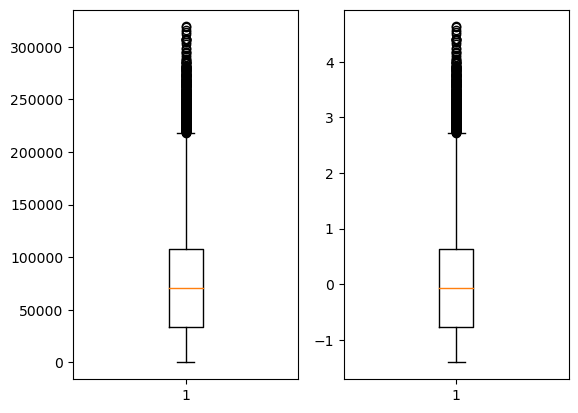

In [35]:
plt.subplot(1,2,1)
plt.boxplot(visa_df["prevailing_wage"])
plt.subplot(1,2,2)
plt.boxplot(visa_df["prevailing_wage_zscore"])
plt.show()

In [ ]:
# Insted of doing above process we can simply use package 
# instead labelencoder use StandardScalar

In [36]:
file_location="C:\\Users\\Greeshma\\OneDrive\\Naresh IT\\files\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [40]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
visa_df["prevailing_wage"]=ss.fit_transform(visa_df[["prevailing_wage"]])
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,-1.398537,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,0.169835,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,0.919079,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,0.169994,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,1.428604,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,0.049924,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,3.876159,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,1.360280,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,0.221509,Year,Y,Certified


{'whiskers': [<matplotlib.lines.Line2D at 0x1494a181610>,
 'caps': [<matplotlib.lines.Line2D at 0x1494a182c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1494a0da910>],
 'medians': [<matplotlib.lines.Line2D at 0x1494a18c110>],
 'fliers': [<matplotlib.lines.Line2D at 0x1494a18ca50>],
 'means': []}

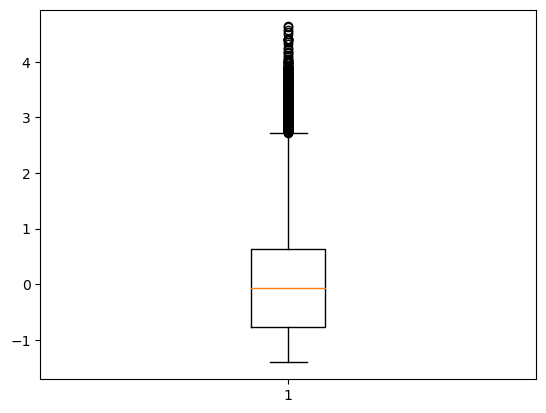

In [41]:
plt.boxplot(visa_df["prevailing_wage"])

# Min-Max Scalar #

In [ ]:
- step-1 : Read the column
    
- step-2 : Calculate min
    
- step-3 : Calculate max
    
- step-4 : Numerator = column - min
    
- step-5 : Denomirator = Max - min 
    
- step-6 : Op=   Numerator / Denomirator

In [53]:
file_location="C:\\Users\\Greeshma\\OneDrive\\Naresh IT\\files\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [54]:
visa_df["prevailing_wage"]

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [56]:
maxx=visa_df["prevailing_wage"].max()
minn=visa_df["prevailing_wage"].min()
maxx,minn

(319210.27, 2.1367)

In [58]:
Nr=visa_df["prevailing_wage"]- minn
Nr

0           590.0662
1         83423.5133
2        122994.7233
3         83431.8933
4        149905.2533
            ...     
25475     77090.4333
25476    279172.6533
25477    146296.7133
25478     86152.6333
25479     70874.7733
Name: prevailing_wage, Length: 25480, dtype: float64

In [59]:
Dr=maxx - minn
Dr

319208.13330000004

In [61]:
Output=Nr/Dr
Output

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage, Length: 25480, dtype: float64

In [67]:
visa_df["prevailing_wage_minmax"]=Output

In [68]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_minmax
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.269895


In [69]:
# Comparing previous value to the new one 
visa_df["prevailing_wage"].min()

2.1367

In [70]:
visa_df["prevailing_wage_minmax"].min()

0.0

In [71]:
visa_df["prevailing_wage"].idxmin()

20575

In [72]:
visa_df["prevailing_wage_minmax"].idxmin()   # Both are same 

20575

# using Package

In [75]:
file_location="C:\\Users\\Greeshma\\OneDrive\\Naresh IT\\files\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [80]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
visa_df["prevailing_wage"]=mm.fit_transform(visa_df[["prevailing_wage"]])
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,0.001849,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,0.261345,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,0.385312,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,0.261371,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,0.469616,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,0.241505,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,0.874579,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,0.458311,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,0.269895,Year,Y,Certified


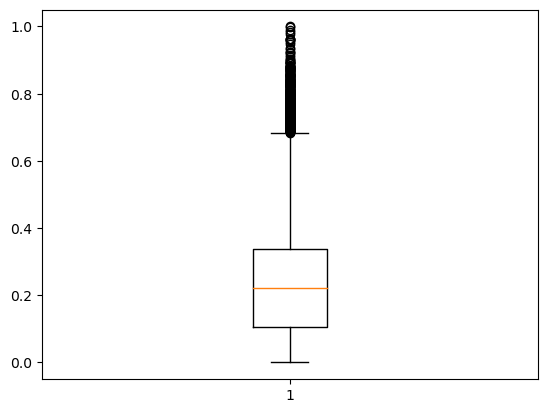

In [82]:
plt.boxplot(visa_df["prevailing_wage"])
plt.show()

# fit_transform

- There are two terms fit and transform

- If you see in Z-score 

   - x : data
        
   - mean : mean of data
    
   - std : std of data

- Will find the value of mean and std , this is called fit 

- Once we find the values we need to apply on entire data , this is called transform 

- fit transform calculate the measurements( parameters or statistics ) and apply on data